In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
# ! git clone https://github.com/neighbornixon/Titanic.git

Cloning into 'Titanic'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 1), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 35.34 KiB | 11.78 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib as plt
import numpy as np

In [89]:
df = pd.read_csv('Titanic/train.csv')
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the ticket_number column
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Name'] = le.fit_transform(df['Name'])
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [90]:
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,0,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,1,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,1,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,1,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,0,35.0,0,0,472,8.0500,147,2


<ipython-input-16-0592f853cc70>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Survived', y='Sex', inner='box', palette='Dark2')


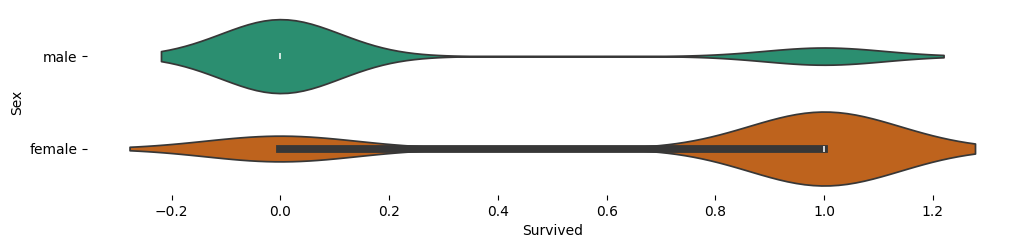

In [16]:
# @title Sex vs Survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

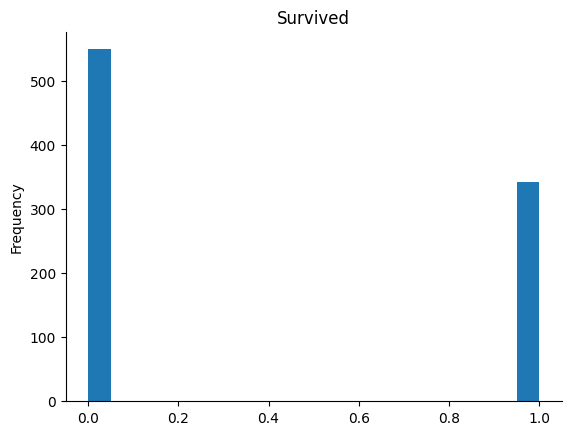

In [15]:
# @title Survived

from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [91]:
df.shape

(714, 12)

In [92]:
y_df = df['Survived']
y_train = np.array(y_df)

X_df = df.drop(columns=['Survived'])
X_train = np.array(X_df)

In [93]:
X_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,0,22.0,1,0,523,7.2500,147,2
1,2,1,190,1,38.0,1,0,596,71.2833,81,0
2,3,3,353,1,26.0,0,0,669,7.9250,147,2
3,4,1,272,1,35.0,1,0,49,53.1000,55,2
4,5,3,15,0,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,684,1,39.0,0,5,480,29.1250,147,1
886,887,2,548,0,27.0,0,0,101,13.0000,147,2
887,888,1,303,1,19.0,0,0,14,30.0000,30,2
889,890,1,81,0,26.0,0,0,8,30.0000,60,0


In [94]:
#BASELINE MODEL
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Coefficients: ', log_reg.coef_)

Coefficients:  [[ 7.36682868e-04 -7.82396277e-01 -1.40659660e-04  2.53715165e+00
  -2.29199435e-02 -3.16403107e-01  3.43022696e-02 -3.57280835e-04
   7.21806396e-03  3.15990451e-03 -5.57062052e-03]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
test_df = pd.read_csv('Titanic/test.csv')

test_df['Sex'] = test_df['Sex'].replace({'male': 0, 'female': 1})
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')
# Fit and transform the ticket_number column
test_df['Ticket'] = le.fit_transform(test_df['Ticket'])
test_df['Cabin'] = le.fit_transform(test_df['Cabin'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])
test_df['Name'] = le.fit_transform(test_df['Name'])

test_df = test_df.dropna()

X_test = np.array(test_df)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,0,34.5,0,0,152,7.8292,76,1
1,893,3,403,1,47.0,1,0,221,7.0000,76,2
2,894,2,269,0,62.0,0,0,73,9.6875,76,1
3,895,3,408,0,27.0,0,0,147,8.6625,76,2
4,896,3,178,1,22.0,1,1,138,12.2875,76,2
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,296,1,3.0,1,1,351,13.7750,76,2
411,1303,1,262,1,37.0,1,0,48,90.0000,41,1
412,1304,3,172,1,28.0,0,0,184,7.7750,76,2
414,1306,1,283,1,39.0,0,0,324,108.9000,22,0


In [98]:
# predict
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_prob >= 0.5).astype(int)
y_pred

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
409,1301
411,1303
412,1304
414,1306


In [99]:
passenger_ids = test_df['PassengerId']
results_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred
})
results_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
409,1301,1
411,1303,1
412,1304,1
414,1306,1


In [100]:
results_df.to_csv('predictions.csv', index=False)